# Playground for Time-series Cross-validation
Feb 28th 2022  
Information obtained from this [Medium post](https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4)

In [44]:
import os
print(os.getcwd())
import numpy as np
from IPython.display import display, Image
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_3/2_arima_sarima_models


## 1) TimeSeriesSplit
This approach may introduce leakage from future data to the model

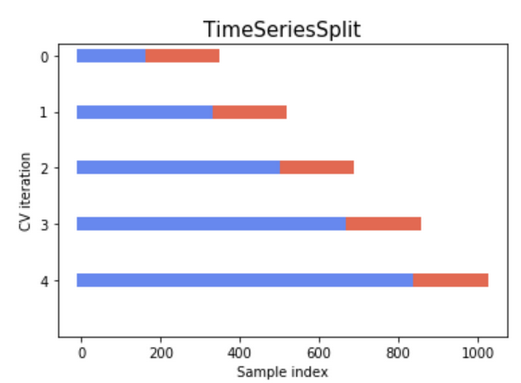

In [47]:
display(Image('tscv_types/time-series-split.png'))

In [24]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
display(x)
y= np.array([1, 2, 3, 4, 5, 6])
display(y)

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

array([1, 2, 3, 4, 5, 6])

In [8]:
tscv= TimeSeriesSplit()
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [19]:
tscv= TimeSeriesSplit(gap= 0, max_train_size= None, n_splits= 3)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)


In [39]:
for train_index, test_index in tscv.split(x):
    print("Train: {} Test: {}".format(train_index, test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Train: [0 1] Test: [2]
Train: [0 1 2] Test: [3]
Train: [0 1 2 3] Test: [4]
Train: [0 1 2 3 4] Test: [5]


| Method   |     Split     | Pros | Cons |
|----------|:-------------:| :-------------:| :-------------:|
| TimeSeriesSplit  | k | More splits & can inspect how model behaves on different days |  May create leakage from future data to the model|

## 2) Blocked Cross validation
It work by adding margins at two positions:
* 1) Between the training and validation folds 
* 2) Between the folds used at each iteration 

More information [here](https://goldinlocks.github.io/Time-Series-Cross-Validation/)

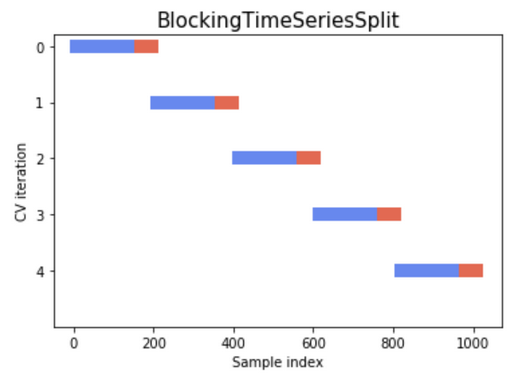

In [48]:
display(Image('tscv_types/blocked-cv.png'))

In [40]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.5 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

| Method   |     Split     | Pros | Cons |
|----------|:-------------:| :-------------:| :-------------:|
| TimeSeriesSplit  | k | More splits & can inspect how model behaves on different days |  May create leakage from future data to the model|
| BlockingTimeSeriesSplit | k | More splits & solves data leakage issue | Maybe computationally expensive

## 3) Nested Cross-validation
Day Forward-Chaining

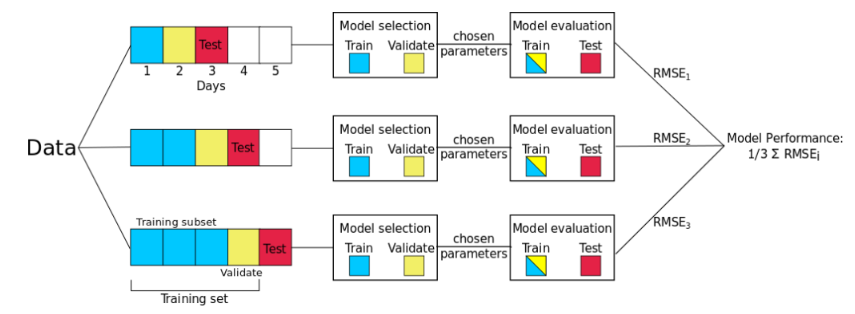

In [49]:
display(Image(filename='tscv_types/day.forward.chaining.png'))

| Method   |     Split     | Pros | Cons |
|----------|:-------------:| :-------------:| :-------------:|
| TimeSeriesSplit  | k | More splits & can inspect how model behaves on different days |  May create leakage from future data to the model|
| BlockingTimeSeriesSplit | k | More splits & solves data leakage issue | Maybe computationally expensive
| Day Forward Chaining | k | More splits & can inspect how model behaves in different days | Multiple models & requires consistent num of days in data for each participant